In [1]:
import numpy as np

In [2]:
state = np.load('state_save-9291.npy')

In [3]:
action = np.load('act_save-9291.npy')

In [4]:

x_SimpleKalman = 0
P_SimpleKalman = 6

def SimpleKalman(z, u):
    A = 1
    B = 0.1
    H = 1

    Q = 0
    R = 4
    
    global x_SimpleKalman, P_SimpleKalman
    x = x_SimpleKalman
    P = P_SimpleKalman

    # Prediction
    xp = A*x + B*u;     # State prediction

    xp = min(xp, 0.2);
    xp = max(xp, -0.2);

    Pp = A*P*A+ Q;     # Error covariance prediction

    # Estimation
    K = Pp*H*1/(H*Pp*H + R); # Kalman gain

    x = xp + K*(z - H*xp);  # State estimation
    P = Pp - K*H*Pp;    # Error covariance estimation

    volt = x;
    
    x_SimpleKalman = x
    P_SimpleKalman = P
    
    return volt


In [5]:
v3 = state[:,2+3]
act3 = action[:,2]


Nsamples = v3.shape[0];

Xsaved = np.zeros(Nsamples);
Zsaved = np.zeros(Nsamples);

for k in range(Nsamples):
    z = v3[k];
    u = act3[k]*0.2;
    volt = SimpleKalman(z,u);

    Xsaved[k] = volt;
    Zsaved[k] = z; 



In [6]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

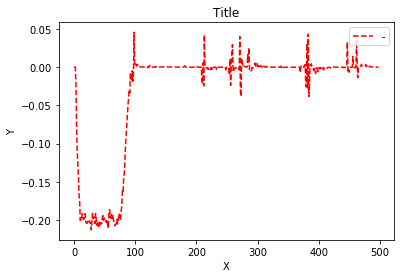

In [14]:
xypoints = v3

plt.plot(np.array(xypoints).reshape(-1), 'r--', label='-')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()

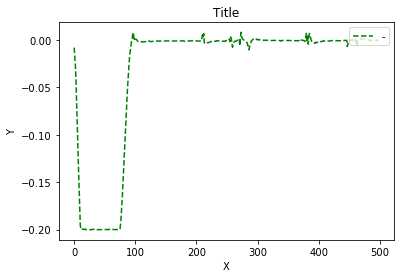

In [15]:
xypoints = Xsaved

plt.plot(np.array(xypoints).reshape(-1), 'g--', label='-')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()

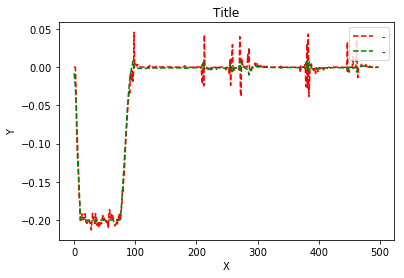

In [16]:
xypoints = v3
plt.plot(np.array(xypoints).reshape(-1), 'r--', label='-')

xypoints = Xsaved
plt.plot(np.array(xypoints).reshape(-1), 'g--', label='-')

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()